# Imports

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Config
sns.set_theme(style="darkgrid")
sns.set()

# Open file

In [2]:
df = pd.read_csv("../data/clear_data.csv")

In [3]:
df.head()

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,published_at,remote_interview,remote,contract_type,salary_min,salary_max,currency,technology,levels
0,.NET Developer,Warszawa,PL,net,partly_remote,C. H. Robinson,15000,mid,52.232258,20.984269,2021-02-20T16:00:06.464Z,True,False,permanent,7000.0,13000.0,pln,"['Azure', '.Net', 'C#']","[1, 4, 4]"
1,Mid DevOps Engineer,Warszawa,PL,devops,partly_remote,STEPWISE,30,mid,52.226816,20.998821,2021-02-20T16:00:06.464Z,True,False,b2b,10000.0,15000.0,pln,"['Continuous Integration', 'Linux', 'Docker']","[4, 4, 4]"
2,Android Senior Software Engineer,Warszawa,PL,mobile,partly_remote,ViacomCBS,10 000+,senior,52.220512,21.018066,2021-02-20T16:00:06.464Z,True,False,permanent,NaN,NaN,NaN,"['RxKotlin', 'Kotlin', 'Android']","[4, 5, 5]"
3,Junior Technical Implementation Engineer,Gdańsk,PL,support,office,Nevion Sp z o.o.,200,junior,54.339482,18.553891,2021-02-20T16:00:06.464Z,True,False,permanent,7000.0,10000.0,pln,[],[]
4,Senior Java Developer,Warszawa,PL,java,remote,ASTEK Polska,800,senior,52.229375,21.013196,2021-02-20T16:00:06.464Z,True,True,b2b,16000.0,20600.0,pln,"['Hibernate', 'Java', 'Spring']","[4, 4, 4]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4247 non-null   object 
 1   city              4247 non-null   object 
 2   country_code      4247 non-null   object 
 3   marker_icon       4247 non-null   object 
 4   workplace_type    4247 non-null   object 
 5   company_name      4247 non-null   object 
 6   company_size      4247 non-null   object 
 7   experience_level  4247 non-null   object 
 8   latitude          4247 non-null   float64
 9   longitude         4247 non-null   float64
 10  published_at      4247 non-null   object 
 11  remote_interview  4247 non-null   bool   
 12  remote            4247 non-null   bool   
 13  contract_type     4247 non-null   object 
 14  salary_min        2822 non-null   float64
 15  salary_max        2822 non-null   float64
 16  currency          2822 non-null   object 


# Salary Target

In [5]:
df['salary_min'].isna().sum()
df = df.dropna()

# City

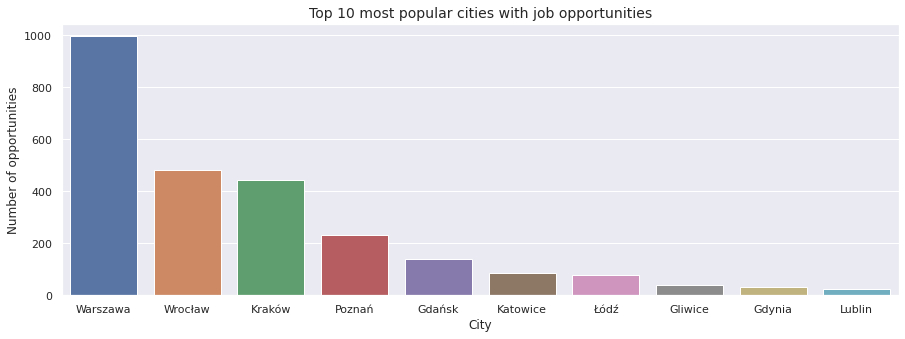

In [6]:
# Get first ten cities from column 'city'
city = df['city'].value_counts()[:10]

# Plotting a bar graph
plt.figure(figsize=(15,5))
sns.barplot(x=city.index, y=city.values)

# Simple config
plt.title("Top 10 most popular cities with job opportunities", fontsize=14)
plt.ylabel("Number of opportunities")
plt.xlabel("City")
plt.show()

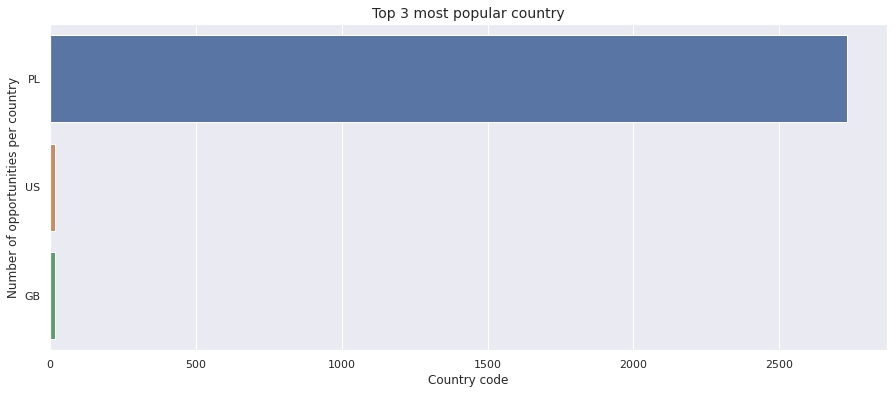

In [7]:
countries = df['country_code'].value_counts()[:3]


# Plotting a bar graph
plt.figure(figsize=(15,6))
sns.barplot(y=countries.index, x=countries.values, orient="h")

# Simple config
plt.title("Top 3 most popular country", fontsize=14)
plt.ylabel("Number of opportunities per country")
plt.xlabel("Country code")
plt.show()

In [8]:
df = df.loc[df['country_code'] == "PL"]

# Technologies

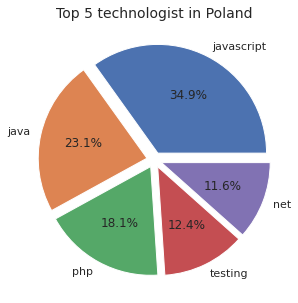

In [9]:
technologies = df['marker_icon'].value_counts()[:5]

plt.figure(figsize=(10,5))
plt.pie(x=technologies.values, labels=technologies.index, explode=[0.07]*5, autopct="%.1f%%")
plt.title("Top 5 technologist in Poland", fontsize=14)
plt.show()

In [10]:
df.head(1)

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,published_at,remote_interview,remote,contract_type,salary_min,salary_max,currency,technology,levels
0,.NET Developer,Warszawa,PL,net,partly_remote,C. H. Robinson,15000,mid,52.232258,20.984269,2021-02-20T16:00:06.464Z,True,False,permanent,7000.0,13000.0,pln,"['Azure', '.Net', 'C#']","[1, 4, 4]"


In [11]:
skills = []
import ast

def get_skill(x):
    x = ast.literal_eval(x)
    for num_skills in range(len(x)):
        try:
            skills.append(x[num_skills])
        except:
            continue
    return skills

df['technology'].apply(lambda x: get_skill(x))

0       [Azure, .Net, C#, Continuous Integration, Linu...
1       [Azure, .Net, C#, Continuous Integration, Linu...
3       [Azure, .Net, C#, Continuous Integration, Linu...
4       [Azure, .Net, C#, Continuous Integration, Linu...
7       [Azure, .Net, C#, Continuous Integration, Linu...
                              ...                        
4239    [Azure, .Net, C#, Continuous Integration, Linu...
4241    [Azure, .Net, C#, Continuous Integration, Linu...
4242    [Azure, .Net, C#, Continuous Integration, Linu...
4245    [Azure, .Net, C#, Continuous Integration, Linu...
4246    [Azure, .Net, C#, Continuous Integration, Linu...
Name: technology, Length: 2731, dtype: object

In [12]:
unique_skills = set(skills)
print(len(unique_skills))

1001


In [13]:
df['total_skills'] = df['levels'].apply(lambda x: len(ast.literal_eval(x)))

# Workplace vs. COVID-19

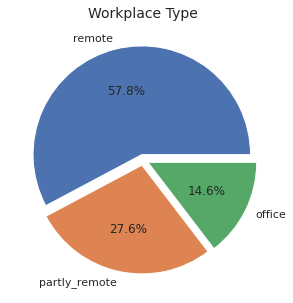

In [14]:
df_workplace = df['workplace_type'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(x=df_workplace.values, labels=df_workplace.index, explode=[0.05]*3, autopct="%.1f%%")
plt.title("Workplace Type", fontsize=14)
plt.show()

# Company size

In [15]:
df['company_size']

0        15000
1           30
3          200
4          800
7           40
         ...  
4239     10-50
4241    50-100
4242      7-10
4245        30
4246         6
Name: company_size, Length: 2731, dtype: object

In [16]:
def clear_data(x):
    x = x.split('-')[0]
    x = re.sub('[-+<>,.]', '', x)
    x = x.replace(' ', '')
    if x == '':
        x = x.replace('', '0')
    x = int(x)
    return x

In [17]:
df['company_size'] = df['company_size'].apply(lambda x: clear_data(x))

In [18]:
df['company_size_bin'] = pd.cut(df['company_size'],
                                bins=[0,30,500,1000,100000],
                                labels=["very_small", "small","medium", 'large'])

# Experience Level

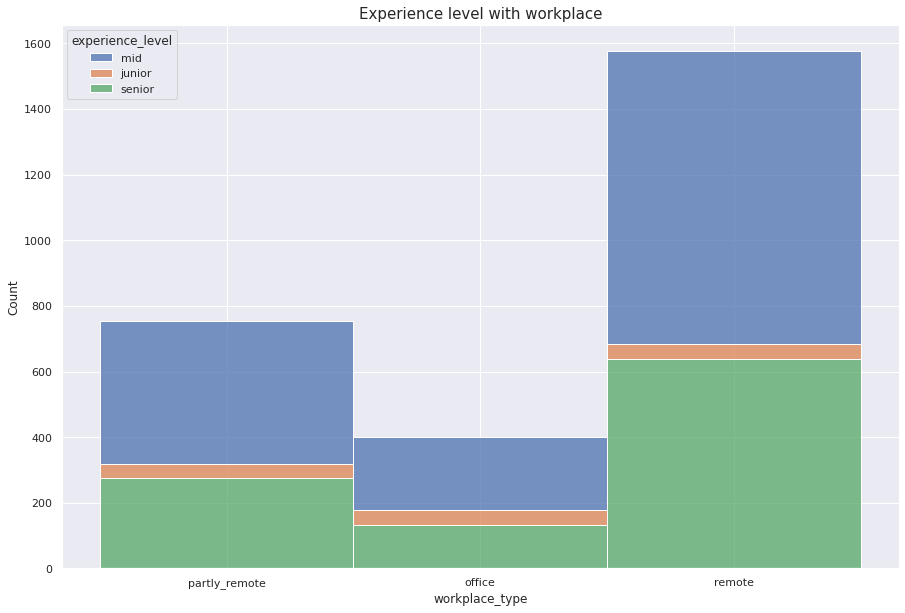

In [19]:
plt.figure(figsize=(15,10))

sns.histplot(
    df,
    x="workplace_type", hue="experience_level",
    multiple="stack",
);

plt.title("Experience level with workplace", fontsize=15.0);

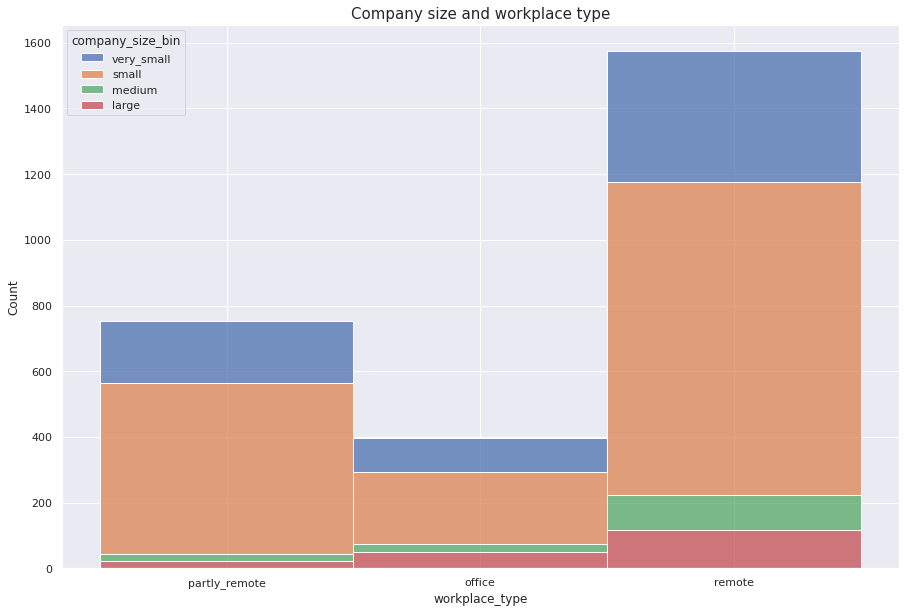

In [20]:
plt.figure(figsize=(15,10))

sns.histplot(
    df,
    x="workplace_type", hue="company_size_bin",
    multiple="stack",
);

plt.title("Company size and workplace type", fontsize=15.0);

# Salary

In [21]:
df['salary_mean'] = df[['salary_min', 'salary_max']].mean(axis=1)

### Convert to EUR, USD to PLN

In [22]:
df['currency'].value_counts()

pln    2708
usd      18
eur       5
Name: currency, dtype: int64

In [23]:
currency = {"usd": 3.70,
            "eur": 4.50,
            "gbp": 5.21,
            "chf": 4.12,
            "pln" : 1.0
           }

In [24]:
df = df.replace({"currency": currency})

In [25]:
df['salary_mean'] = df['salary_mean'] * df['currency']

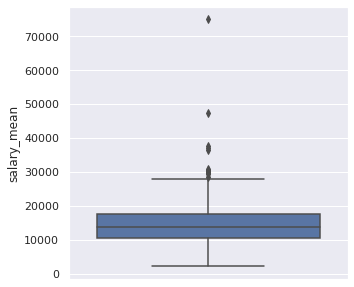

In [26]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df['salary_mean']);

In [27]:
df['salary_mean'].describe()

count     2731.000000
mean     14171.428964
std       5039.399261
min       2250.000000
25%      10500.000000
50%      13860.000000
75%      17690.000000
max      75000.000000
Name: salary_mean, dtype: float64

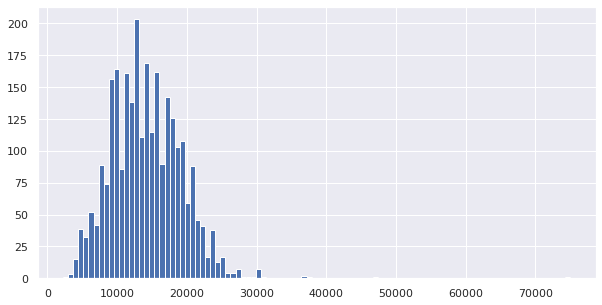

In [28]:
plt.figure(figsize=(10,5))
df['salary_mean'].hist(bins=100);

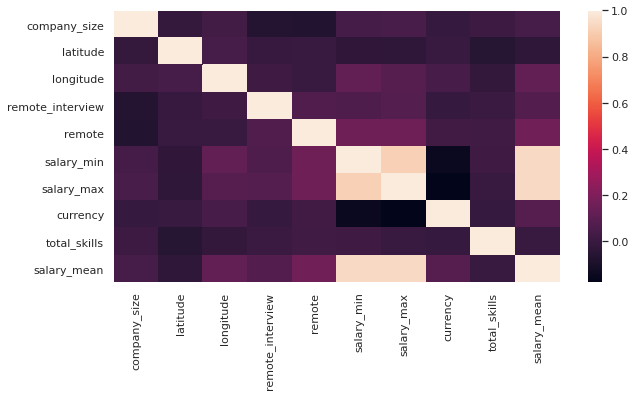

In [29]:
plt.figure(figsize=(10,5))
df_corr = df.corr()
sns.heatmap(data=df_corr);

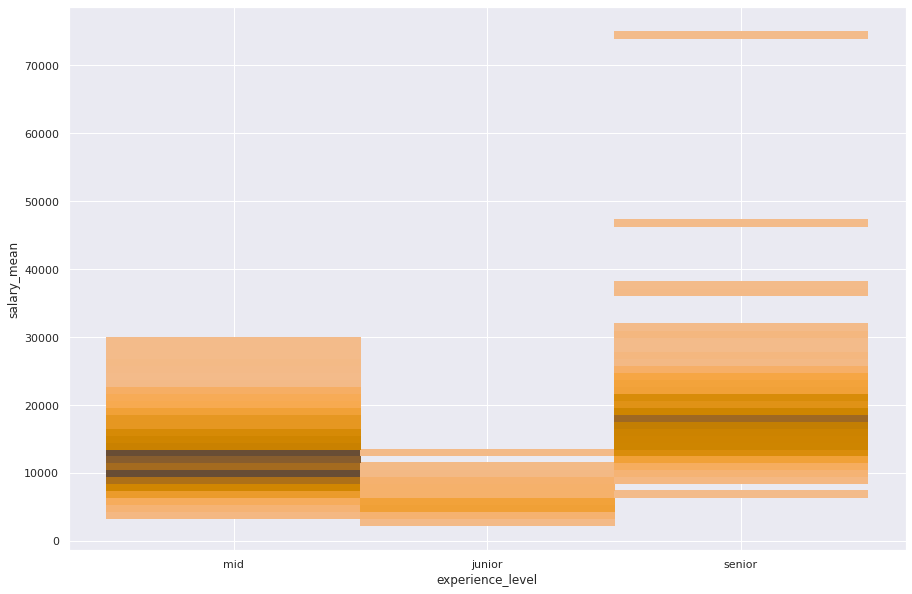

In [30]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='experience_level', y='salary_mean', color="orange");

# Create numerical data

In [31]:
df.head()

,title,city,country_code,marker_icon,workplace_type,company_name,company_size,experience_level,latitude,longitude,...,remote,contract_type,salary_min,salary_max,currency,technology,levels,total_skills,company_size_bin,salary_mean
0,.NET Developer,Warszawa,PL,net,partly_remote,C. H. Robinson,15000,mid,52.232258,20.984269,...,False,permanent,7000.0,13000.0,1.0,"['Azure', '.Net', 'C#']","[1, 4, 4]",3,large,10000.0
1,Mid DevOps Engineer,Warszawa,PL,devops,partly_remote,STEPWISE,30,mid,52.226816,20.998821,...,False,b2b,10000.0,15000.0,1.0,"['Continuous Integration', 'Linux', 'Docker']","[4, 4, 4]",3,very_small,12500.0
3,Junior Technical Implementation Engineer,Gdańsk,PL,support,office,Nevion Sp z o.o.,200,junior,54.339482,18.553891,...,False,permanent,7000.0,10000.0,1.0,[],[],0,small,8500.0
4,Senior Java Developer,Warszawa,PL,java,remote,ASTEK Polska,800,senior,52.229375,21.013196,...,True,b2b,16000.0,20600.0,1.0,"['Hibernate', 'Java', 'Spring']","[4, 4, 4]",3,medium,18300.0
7,Fullstack Developer (React/Node),Kraków,PL,javascript,remote,From Poland With Dev,40,senior,50.063715,19.925808,...,True,b2b,18000.0,22000.0,1.0,"['writing tests', 'React.JS', 'Node.js']","[3, 3, 3]",3,small,20000.0


In [32]:
# Remove columns

columns_to_drop = ['company_name', 
           'company_size',
           'salary_min',
           'salary_max',
           'currency',
           'published_at',
           'longitude',
           'latitude', 
           'remote_interview', 
           'remote',
           'technology',
           'levels', 'title','country_code']

df = df.drop(columns_to_drop, axis=1)

In [33]:
df.head()

,city,marker_icon,workplace_type,experience_level,contract_type,total_skills,company_size_bin,salary_mean
0,Warszawa,net,partly_remote,mid,permanent,3,large,10000.0
1,Warszawa,devops,partly_remote,mid,b2b,3,very_small,12500.0
3,Gdańsk,support,office,junior,permanent,0,small,8500.0
4,Warszawa,java,remote,senior,b2b,3,medium,18300.0
7,Kraków,javascript,remote,senior,b2b,3,small,20000.0


In [34]:
df.to_csv("../data/clear_output_data.csv", index=False)

In [35]:
df = pd.read_csv('../data/clear_output_data.csv')

In [36]:
df['city'] = df['city'].astype('category')
df['city'] = df['city'].cat.codes

df['marker_icon'] = df['marker_icon'].astype('category')
df['marker_icon'] = df['marker_icon'].cat.codes

df = pd.get_dummies(df, columns=['workplace_type', 'experience_level', 'contract_type', 'company_size_bin'], prefix="feature")

In [37]:
df.head()

,city,marker_icon,total_skills,salary_mean,feature_office,feature_partly_remote,feature_remote,feature_junior,feature_mid,feature_senior,feature_b2b,feature_mandate_contract,feature_permanent,feature_large,feature_medium,feature_small,feature_very_small
0,38,10,3,10000.0,0,1,0,0,1,0,0,0,1,1,0,0,0
1,38,3,3,12500.0,0,1,0,0,1,0,1,0,0,0,0,0,1
2,7,19,0,8500.0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,38,7,3,18300.0,0,0,1,0,0,1,1,0,0,0,1,0,0
4,15,8,3,20000.0,0,0,1,0,0,1,1,0,0,0,0,1,0


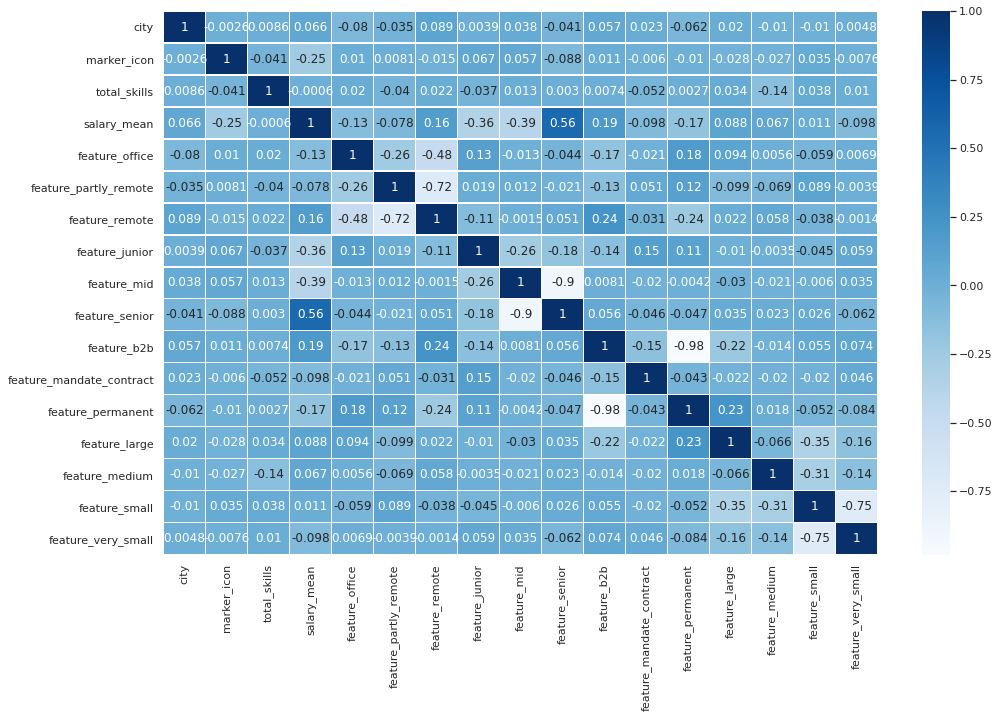

In [38]:
plt.figure(figsize=(16,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, linewidths=0.5, cmap="Blues");

In [39]:
df.to_csv("../data/numerical_df", index=False)